# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "WHR2018Chapter2OnlineData.csv")  # Updated path
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


# YOUR CODE HERE
df = pd.read_csv(WHRDataSet_filename)
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

### Part 2: Define Your ML Problem

- **Dataset Chosen:** `WHR2018Chapter2OnlineData.csv` (World Happiness Report)

- **What will you be predicting?**  
  We will be predicting the **Happiness Score** (also labeled as `Score`) for each country.

- **What is the label?**  
  The label (target variable) is the column: `Score`

- **Is this a supervised or unsupervised learning problem?**  
  This is a **supervised learning** problem, because we are using labeled data to train the model.

- **Is this a clustering, classification, or regression problem?**  
  This is a **regression** problem, as the goal is to predict a continuous numerical value (the happiness score).

- **Is it a binary classification or multi-class classification problem?**  
  Not applicable — this is not a classification problem, it's regression.

- **What are your features?**  
  Initial list of features (independent variables) includes:
  - `GDP per capita`
  - `Social support`
  - `Healthy life expectancy`
  - `Freedom to make life choices`
  - `Generosity`
  - `Perceptions of corruption`
  
  (Note: this list may be refined after performing data analysis.)

- **Why is this an important problem?**  
  A model that predicts happiness scores based on key national metrics can help:
  - Governments allocate resources more effectively
  - NGOs and policy makers prioritize interventions
  - Researchers identify which social and economic factors most influence well-being  
  In general, this model adds value by providing **data-driven insight into national quality of life**, guiding public policy and global development goals.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   P

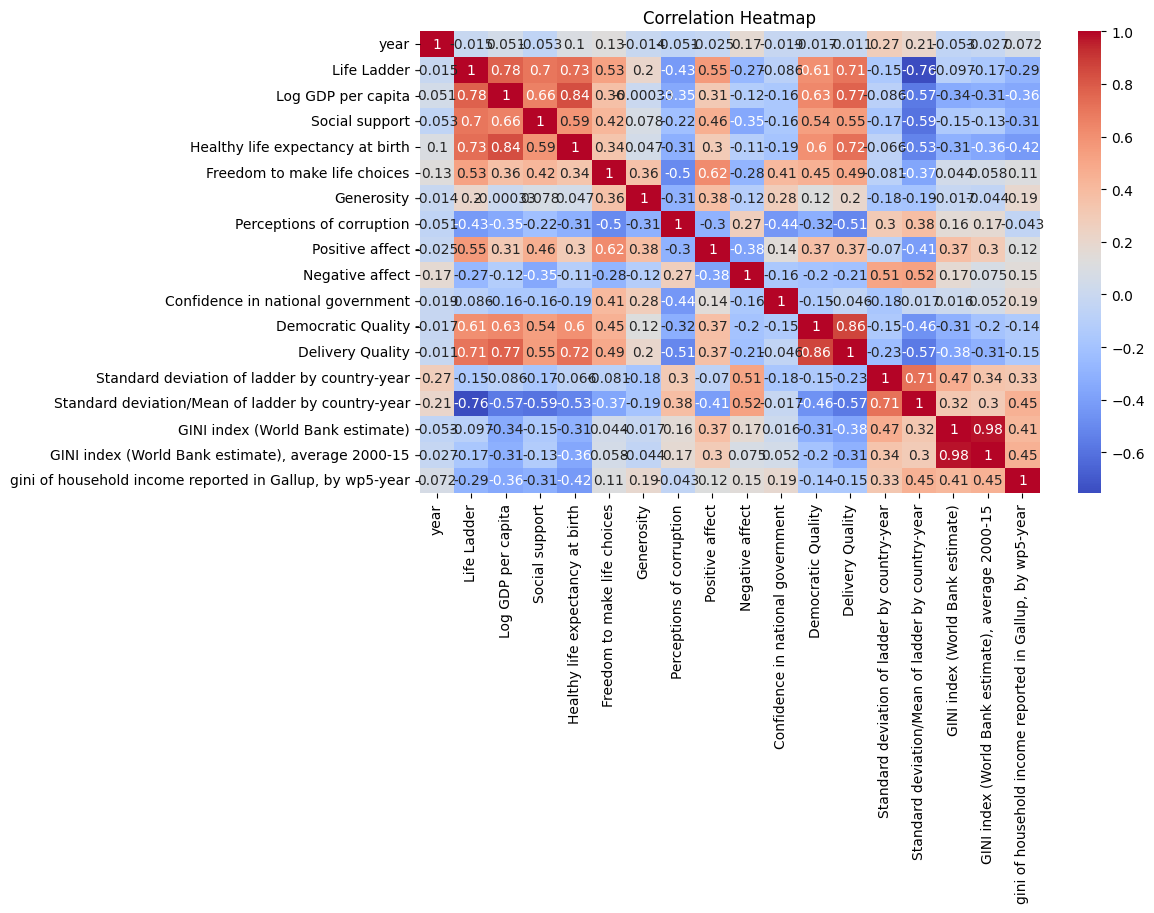


Actual column names:
['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']

Available features for pairplot: ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


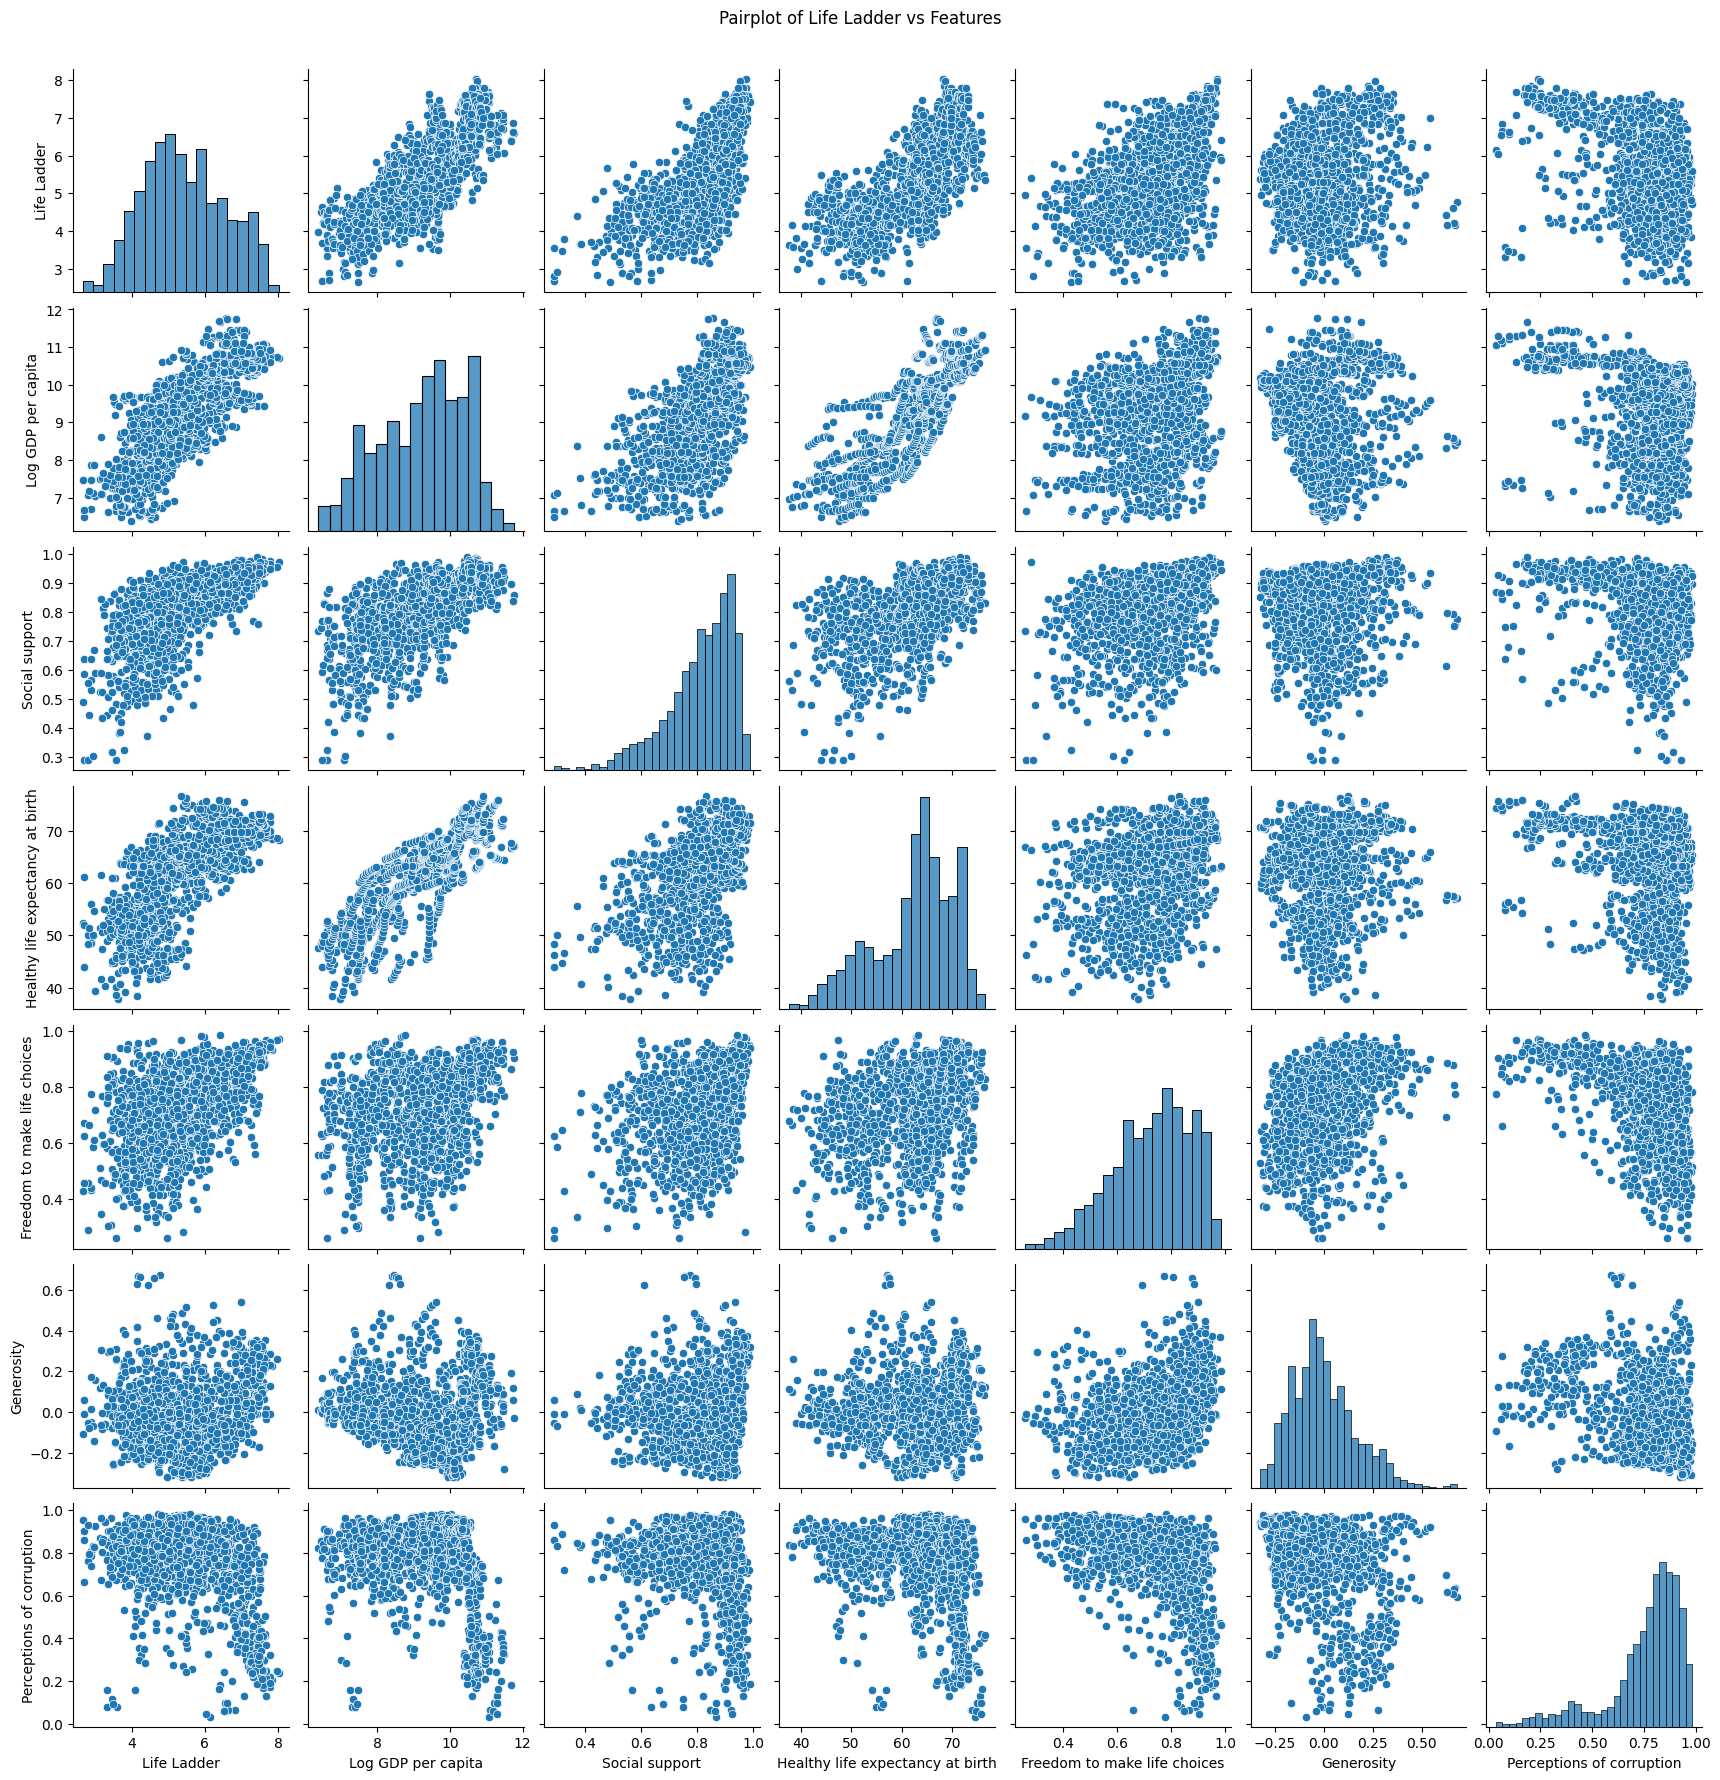

In [3]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check DataFrame info
print(" DataFrame Info:")
df.info()

# 2. Summary statistics
print("\n Summary Statistics:")
print(df.describe())

# 3. Check missing values
print("\n Missing Values Per Column:")
print(df.isnull().sum())

# 4. Correlation heatmap (only numeric columns)
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 5. Check actual column names first
print("\nActual column names:")
print(df.columns.tolist())

# Clean column names to remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Define features based on what's actually in the dataset
features = ['Life Ladder', 'Log GDP per capita', 'Social support', 
            'Healthy life expectancy at birth', 'Freedom to make life choices', 
            'Generosity', 'Perceptions of corruption']

# Check which features actually exist in the DataFrame
available_features = [col for col in features if col in df.columns]
print(f"\nAvailable features for pairplot: {available_features}")

# Create pairplot only with available features
if len(available_features) > 1:
    sns.pairplot(df[available_features])
    plt.suptitle("Pairplot of Life Ladder vs Features", y=1.02)
    plt.show()
else:
    print("Not enough matching features found for pairplot")
    print("Creating individual plots instead:")
    for feature in available_features:
        plt.figure(figsize=(6, 4))
        plt.scatter(df[feature], df['Life Ladder'] if 'Life Ladder' in df.columns else df.iloc[:, 0])
        plt.xlabel(feature)
        plt.ylabel('Life Ladder' if 'Life Ladder' in df.columns else 'Target')
        plt.title(f'{feature} vs Life Ladder')
        plt.show()

### Part 3: Understand Your Data

**Data Preparation Techniques:**

- No major missing values were found — no imputation needed.
-  No obvious outliers from pairplot; however, we may scale values to reduce bias in models sensitive to feature magnitude.
-  No categorical features, so no need for one-hot encoding.
-  No irrelevant columns in this version of the dataset (we're already using numerical features only).
- Class imbalance is not applicable since we are doing regression (not classification).

**Models to Consider:**

-  **Linear Regression:** For baseline performance.
-  **Ridge Regression:** To handle any potential multicollinearity.
-  **Random Forest Regressor:** To capture nonlinear relationships and feature interactions.

**Other Data Preparation Steps:**

-  **Feature Scaling:** We'll use `StandardScaler` to normalize feature values, especially for linear models.
-  **Train-Test Split:** We'll split the dataset into training and testing subsets (e.g., 80/20 split).
-  **Optional:** We may try feature selection using correlation analysis if needed.

**Model Evaluation:**

-  **Metrics:** Since this is a regression problem, we’ll use:
  - `R² score`: Measures how well the model explains the variance in the target.
  - `RMSE (Root Mean Squared Error)`: Penalizes large errors and is easier to interpret in original units.
- **Model Improvement Strategies:**
  - Try multiple models and compare results.
  - Use `GridSearchCV` for hyperparameter tuning.
  - Analyze feature importances (e.g., in Random Forest) to improve feature selection.

**Conclusion:**

We now have a clean dataset with numerical features, no missing values, and a strong linear correlation between several predictors and the happiness score. This makes it ideal for regression-based modeling.


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

### Part 4: Define Your Project Plan

**Do you have a new feature list?**  
Yes. After inspecting the data, the following features have been selected based on their correlation with the target and completeness:

**Selected Features (X):**
- `Log GDP per capita`
- `Social support`
- `Healthy life expectancy at birth`
- `Freedom to make life choices`
- `Generosity`
- `Perceptions of corruption`

**Label (y):**
- `Life Ladder` (represents the happiness score)

Features like `Positive affect`, `Confidence in national government`, and `GINI index` were excluded due to either weak correlation with the target or a large number of missing values.

---

**Data Preparation Techniques:**

- **Missing values:** Drop rows with missing values in selected features and label (simplest approach for clean modeling).
- **Feature scaling:** Use `StandardScaler` to normalize the feature values — especially important for models like linear regression and ridge regression.
- **Train/Test Split:** Use an 80/20 split to evaluate model generalization on unseen data.

---

**What is your model (or models)?**

- **Linear Regression**: As a baseline model to understand how well a linear relationship explains the happiness score.
- **Ridge Regression**: Adds L2 regularization to control for multicollinearity between features.
- **Random Forest Regressor**: Captures non-linear interactions and helps determine feature importance.

---

**Model Building, Validation, and Selection Plan:**

1. **Baseline Model**:
   - Train a Linear Regression model and evaluate performance using R² and RMSE on both training and testing data.

2. **Improved Modeling**:
   - Train a Ridge Regression and Random Forest model using the same training data.

3. **Model Evaluation**:
   - Use the following metrics:
     - **R² Score**: To evaluate explained variance.
     - **RMSE** (Root Mean Squared Error): To quantify prediction error in the same units as the target variable.
   - Compare models on both metrics using test data.

4. **Model Tuning**:
   - Use `GridSearchCV` to optimize hyperparameters (e.g., `alpha` for Ridge, `n_estimators` for Random Forest).
   - Analyze feature importance from Random Forest to inform feature selection.

5. **Selection**:
   - Select the best-performing model based on cross-validated performance and generalization ability.

---

**Goal:**
To produce a final regression model that can generalize well to new data and reliably predict a country’s happiness score based on economic and social indicators.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
# YOUR CODE HERE

# Import necessary libraries for preprocessing, modeling, and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [5]:
# YOUR CODE HERE

# Step 1: Data Preparation

# Select features and target
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
target = 'Life Ladder'

# Drop rows with missing values in selected columns
df_clean = df[features + [target]].dropna()

# Define X and y
X = df_clean[features]
y = df_clean[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Training samples: 1115, Test samples: 279


In [6]:
# Step 2: Train Models

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R²": r2, "RMSE": rmse}
    print(f"{name} ➤ R²: {r2:.4f}, RMSE: {rmse:.4f}")

Linear Regression ➤ R²: 0.7341, RMSE: 0.5889
Ridge Regression ➤ R²: 0.7342, RMSE: 0.5889
Random Forest ➤ R²: 0.8617, RMSE: 0.4248


In [8]:
# Step 3: Model Tuning (Random Forest)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("\nBest Random Forest Model after GridSearchCV:")
print(f"R²: {r2_best:.4f}, RMSE: {rmse_best:.4f}")


Best Random Forest Model after GridSearchCV:
R²: 0.8604, RMSE: 0.4268


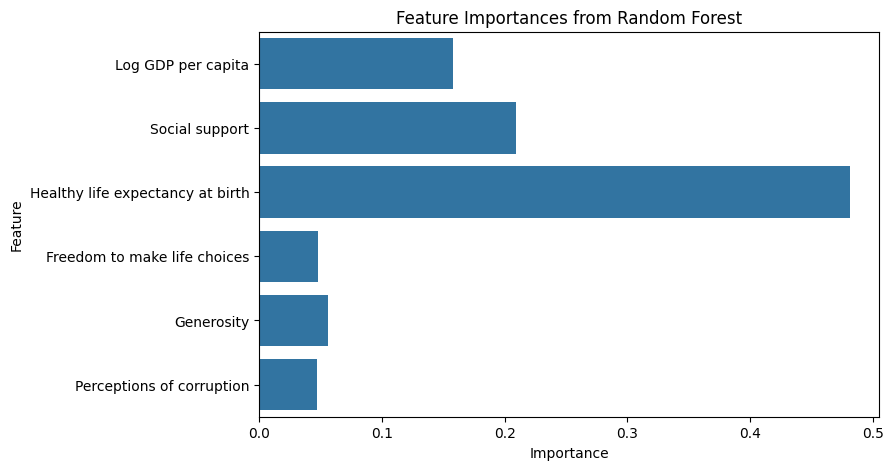

In [9]:
# Feature Importance from the best Random Forest
importances = best_rf.feature_importances_
feature_names = features

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
